# DAT561 Final Project 

#### NOTE: Please be creative in defining the new variables as part of the data manipulation and write your description at the end of each code as the comment. We will read your logic and description for the assessment.

In [2]:
import numpy as np
import pandas as pd

In [3]:
#read the dataset here
Property_details = pd.read_csv("Property_details.csv") 
Order_details = pd.read_csv("Order_details.csv")

## Question 1

#### Part (a): How many properties are there in the region with the zip code of 84100? 
#### Part (b): What is the mean, standard deviation, median, min, and max of “starratings” for all properties in the region with the zip code of 84100?


In [4]:
#(1a)
df_1 = Property_details.loc[Property_details["zipcode"] == 84100]
print("There are %d properties in the region with the zip code of 84100" % df_1.shape[0])

There are 52 properties in the region with the zip code of 84100


In [5]:
#(1b)
df_1["starrating"].describe()

count    52.000000
mean      2.846154
std       0.751068
min       2.000000
25%       2.000000
50%       3.000000
75%       3.000000
max       4.000000
Name: starrating, dtype: float64

The mean is 2.85. The standard deviations is 0.75. Median is 3. Min is 2 and max is 4.

## Question 2

 #### Part (a): Create a new column called "weekday", which is the day of the “reservation date” in one week (for example, if the reservation date is 2021/10/22, the corresponding value in the new column "weekday" should be “Friday”).
#### Part (b): Which "weekday" does receive the most reservation? 


In [6]:
#(2a)
Order_details["reservation date"]=pd.to_datetime(Order_details["reservation date"])
Order_details.dtypes #check the type of reservation date column, should have been changed to datetime

Order_details["weekday"]=Order_details["reservation date"].dt.strftime("%A")

#Order_details["weekday"]=Order_details["reservation date"].dt.weekday_name 
Order_details["weekday"]

0         Saturday
1         Saturday
2           Friday
3         Saturday
4         Saturday
            ...   
165868     Tuesday
165869     Tuesday
165870     Tuesday
165871     Tuesday
165872     Tuesday
Name: weekday, Length: 165873, dtype: object

In [7]:
#(2b)
weekday_reservation = Order_details.groupby("weekday").id.count().sort_values(ascending = False)
print(weekday_reservation) #to see numbers of reservations received on each day
print("Thursday receives the most reservations of %d" % weekday_reservation[0])

weekday
Thursday     26589
Monday       26539
Tuesday      24275
Wednesday    24082
Sunday       23030
Friday       20784
Saturday     20574
Name: id, dtype: int64
Thursday receives the most reservations of 26589


## Question 3

#### Part (a): In “roomamenities”, what are the top 10 common room amenities? What about the 10 least common room amenities? ( for example, Air conditioning is one amenity)
#### Part (b): What percentage does each type of room amenities occupy of the total number of reservations for all properties?（do not use the total number of amenities as denominator）


In [8]:
# 3(a)
amenities_dict={}

for amenities in Order_details["roomamenities"]:
    amenity_list =str(amenities).split(": ;")[:-1] #not to include " " in the end
    for amenity in amenity_list:
        if amenity in amenities_dict.keys(): #if the amenity has already been put in the dictionart
            amenities_dict[amenity] += 1   # add 1 to the count
        else:
            amenities_dict[amenity] = 1

sort_amenities = sorted(amenities_dict.items(), key=lambda x: x[1], reverse=True) #sort the dictionary by its values

print("The top 10 common room amenities are:")
for i in sort_amenities[:10]:
    print(i[0])
print("\n")
print("The 10 least common room amenities are:")
for i in sort_amenities[(len(sort_amenities)-10):(len(sort_amenities)+1)]:
    print(i[0])

The top 10 common room amenities are:
Air conditioning
In-room safe box
Free Wi-Fi in all rooms!
Hair dryer
Toiletries
Heating
Desk
Telephone
Closet
Towels


The 10 least common room amenities are:
Wi-Fi [free]
In-room tablet
Air purifier
First aid kit
Internet access �?LAN
TV [in bathroom]
Humidifier
Vending machine
Hot tub
Open air bath privileges


In [9]:
# 3(b)
total_reserve = Order_details.shape[0]
amenity_percent = {}

for amenity in amenities_dict:
    amenity_percent[amenity] = str((100*amenities_dict[amenity])/total_reserve) + "%"
amenity_percent

{'Air conditioning': '97.09476527222634%',
 'Alarm clock': '24.08830852519699%',
 'Carpeting': '42.91777444189229%',
 'Closet': '68.34626491351817%',
 'Coffee/tea maker': '47.37479879184677%',
 'Desk': '69.08478173060112%',
 'DVD/CD player': '4.058526704165235%',
 'Fan': '12.297360028455506%',
 'Free Wi-Fi in all rooms!': '95.02028660481211%',
 'Hair dryer': '76.75510782345529%',
 'Heating': '71.85979635021975%',
 'In-room safe box': '97.09476527222634%',
 'Ironing facilities': '41.58422407504536%',
 'Linens': '46.73334418500901%',
 'Mini bar': '31.153955134349772%',
 'Seating area': '25.572576609815943%',
 'Toiletries': '72.34028443447698%',
 'Towels': '64.03995828133571%',
 'TV [flat screen]': '16.884604486565024%',
 'Fireplace': '1.0767273757633853%',
 'Full kitchen': '2.2782490218420115%',
 'High chair': '2.5899332621945708%',
 'Microwave': '4.0326032567084455%',
 'Separate dining area': '5.918986212343178%',
 'Sofa': '16.63501594593454%',
 'TV': '18.449657267909785%',
 'Washing ma

## Question 4


#### Part (a): For each property, there are some abnormal values of 0 in the “onsiteprice”. To better organize the data, you would like to create a new column “replaced onsiteprice” in the dataset by retaining the original non-zero “onsiteprice” of one specific property and replacing the zero value with its median of non-zero “onsiteprice”.

#### Part (b): For each property, calculate the maximum and minimum value of “replaced onsiteprice”, and store these two into corresponding two columns named “Maximum” and “Minimum”. Then create a column named “Normalized Maximum” to store the normalized form of the “Maximum” column. You can use the formula below for the normalization (do not round the result). Store the “hotelcode”, “Maximum”, “Minimum”, “Normalized Maximum” to "Mx_Min Price.csv". 
$ X_{norm} = \frac{X-X_{min}}{X_\max-X_{min}}$

In [10]:
#4(a)
Order_details["replaced_onsiteprice"] = Order_details["onsiteprice"]
median_series = Order_details.loc[Order_details["onsiteprice"] != 0].groupby("propertycode")["onsiteprice"].median() #get median for each property

def get_median(propertycode):
    return median_series[propertycode]

Order_details["property_median"] = Order_details["propertycode"].apply(get_median) #add a column to store median for each property
Order_details.loc[Order_details["replaced_onsiteprice"]==0, "replaced_onsiteprice"]=\
                                   Order_details.loc[Order_details['replaced_onsiteprice']==0, "property_median"] #fill 0 with median
Order_details.drop("property_median",axis = 1, inplace = True) #drop the median column
Order_details.head()

,id,propertycode,dtcollected,reservation date,los,guests,roomtype,onsiteprice,ratedescription,ratetype,...,ispromo,closed,discount,promoname,proxyused,mealinclusiontype,hotelblock,input_dtcollected,weekday,replaced_onsiteprice
0,50677497,634876,10/12/2019 15:46,2019-11-02,1,1,Double Room,82.36,"Room size: 15 m²/161 ft², Shower, 1 king bed",Cancellation policy,...,Y,N,6.24,NaN,media:M3diAproxy@173.44.165.126:80,Free Breakfast,NaN,10/13/2019,Saturday,82.36
1,50672149,8328096,10/12/2019 15:47,2019-11-30,1,1,Vacation Home,636.09,"Shower, Kitchenette, 2 bedrooms, 1 double bed ...",Cancellation policy,...,N,N,0.00,NaN,media:M3diAproxy@173.44.164.126:80,NaN,NaN,10/13/2019,Saturday,636.09
2,50643430,8323442,10/12/2019 15:47,2019-12-20,1,1,Vacation Home,591.74,"Shower, Kitchenette, 2 bedrooms, 1 double bed ...",Extra low price! (non-refundable),...,N,N,0.00,NaN,media:M3diAproxy@173.44.166.122:80,NaN,NaN,10/13/2019,Friday,591.74
3,50650317,7975,10/12/2019 15:47,2019-12-28,1,1,Standard Triple Room,881.48,"Room size: 20 m²/215 ft², Shower, 3 single beds",Extra low price! (non-refundable),...,N,N,0.00,NaN,media:M3diAproxy@209.242.219.141:80,NaN,NaN,10/13/2019,Saturday,881.48
4,50650318,7975,10/12/2019 15:47,2019-12-28,1,1,Standard Triple Room,897.53,"Room size: 20 m²/215 ft², Shower, 3 single beds",Extra low price! (non-refundable),...,N,N,0.00,NaN,media:M3diAproxy@209.242.219.141:80,Free breakfast for {3},NaN,10/13/2019,Saturday,897.53


In [11]:
#4(b)
maximum = Order_details.groupby("propertycode")["replaced_onsiteprice"].max()
minimum = Order_details.groupby("propertycode")["replaced_onsiteprice"].min()

max_maximum = maximum.max() #calculate the max number of maximum
min_maximum = maximum.min() #calculate the min number of maximum
normal_max = [(x-min_maximum)/(max_maximum-min_maximum) for x in maximum]

df_4 = pd.concat([maximum,minimum],axis = 1).reset_index() #concat those two series together
df_4.columns = ["hotelcode","Maximum","Minimum"] #rename columns
df_4["Normalized Maximum"] = normal_max #add the normalize max column
df_4.to_csv("Mx_Min Price.csv") #save to csv file
df_4.head()

,hotelcode,Maximum,Minimum,Normalized Maximum
0,31,374.73,219.52,0.020083
1,56,149.51,73.46,0.007620
2,97,468.83,259.76,0.025290
3,138,321.84,169.66,0.017156
4,147,226.18,122.90,0.011863


## Question 5

#### Part (a): A family of three is planning a trip. How many available hotels do offer a room with the “maxoccupancy” of 3 or more? Available hotel are those whose “propertype” are “Hotels”, “close” are “N”, and “hotelblock” are not “sold out” .
#### Part (b): If this family does not want to pay a room for a “replaced onsiteprice” higher than 150 per night, how many hotels are still available? Use the maximum of “replaced onsiteprice” to compare with 150 due to price fluctuation. 


In [12]:
#5(a) 
# filter results 
tempA=Order_details.loc[(Order_details.closed=='N')&(Order_details.maxoccupancy>=3)&(Order_details.hotelblock!='Sold out'),['propertycode', 'closed', 'maxoccupancy', 'hotelblock','replaced_onsiteprice']]
tempB=Property_details.loc[(Property_details.propertytype=="Hotels"),['propertyid','propertytype']] #filter out hotel property

# use inner join to select hotels satisfy all conditions
SuitableProperties = tempA.merge(tempB, how='inner',left_on='propertycode', right_on='propertyid')

AvailableHotels = SuitableProperties["propertycode"].nunique()

print("%d hotels are available" % AvailableHotels)

3085 hotels are available


In [13]:
#5(b)
SuitableProperties['max_replaced_price']=SuitableProperties.groupby('propertycode')['replaced_onsiteprice'].transform(max) #get max price
SuitableProperties2=SuitableProperties.loc[(SuitableProperties.max_replaced_price<=150),:] #choose rooms with price no greater than 150

AvailableHotels2 = SuitableProperties2["propertycode"].nunique()

print("%d hotels are available" % AvailableHotels2)

1453 hotels are available


## Bonus Question (merge data, filter, groupby, merge three times)
####  Part (a): For each country, find the most expensive property by using “replaced onsiteprice”. Provide id, name, city, country, zip code, address, and average “replaced onsiteprice” of these properties.
#### Part (b): For each country, find the cheapest property by using “replaced onsiteprice”. Provide id, name, city, country, zip code, address, and average “replaced onsiteprice” of these properties.

#### Hint: Each country has numbers of hotels, and each hotel has numbers of prices due to price fluctuation. You need to find the average “replaced onsiteprice” for each hotel first, and sort out the cheapest and the most expensive hotels then.



In [14]:
#(a) 
country_price = Property_details.merge(Order_details[["propertycode","replaced_onsiteprice"]],\
                                       how = "inner",left_on = "propertyid",right_on = "propertycode") #merge data
country_price.drop("propertycode",axis = 1,inplace = True) #drop duplicate column

country_avg = country_price.groupby(["country","propertyid"])["replaced_onsiteprice"].mean().to_frame().reset_index() #calculate mean

country_avg_max = country_avg.groupby("country")["replaced_onsiteprice"].max().to_frame().reset_index() #store max value
country_avg_max = country_avg_max.merge(country_avg,on =["country","replaced_onsiteprice"],how = "inner") 

result1 = country_avg_max.merge(country_price[["propertyid","propertyname","city","country","zipcode","address"]],\
                                on = ["country","propertyid"],how = "inner").drop_duplicates()
result1

,country,replaced_onsiteprice,propertyid,propertyname,city,zipcode,address
0,Austria,655.020000,130055,Superior Alpine Wellnesshotel Karwendel,Pertisau,6213.0,Nr. 54a
4,Belgium,403.902979,49541,Hotel Roosendaelhof,Geel,2440.0,Stationsstraat 50
51,Bulgaria,1072.850000,7503033,Aspen Golf and Ski Resort,Razlog,2760.0,Betolovoto Aspen Golf
55,Croatia,920.066216,112561,Hotel Marmont - Adults Only,Split,21000.0,Zadarska 13
92,Cyprus,304.798466,152681,Hilton Park Nicosia Hotel,Egkomi,NaN,"1 Achaion Street,"
268,Czech Republic,676.515714,367192,Hotel Bila Ruze,Strakonice,38601.0,Palackeho Namesti 80
282,Denmark,288.985946,6720996,The Square,Copenhagen,NaN,Radhuspladsen 14
319,Estonia,200.326364,2202,Radisson Blu Sky Hotel Tallinn,Tallinn,10143.0,Ravala Street 3
341,Finland,512.370000,365601,HavsVidden Resort,Geta,22340.0,Havsviddsvagen 90
342,France,11367.060000,442720,Hotel Astrid,Lourdes,65100.0,Place Merlasse


In [15]:
#(b) 
country_avg_min = country_avg.groupby("country")["replaced_onsiteprice"].min().to_frame().reset_index()
country_avg_min = country_avg_min.merge(country_avg,on =["country","replaced_onsiteprice"],how = "inner")
result2 = country_avg_min.merge(country_price[["propertyid","propertyname","city","country","zipcode","address"]],\
                                on = ["country","propertyid"],how = "inner").drop_duplicates()
result2

,country,replaced_onsiteprice,propertyid,propertyname,city,zipcode,address
0,Austria,12.060000,6537481,Dolomitenhotel,Lienz,9900.0,2 Dolomitenstrasse
1,Belgium,54.589286,174732,Hotel Royal Astrid,Aalst,9300.0,Keizersplein 27
15,Bulgaria,18.826667,449128,Family Hotel Natalis,Hisarya,4180.0,20 Geo Milev Str.
18,Croatia,41.282000,1177961,The Movie Hotel Zagreb,Zagreb,10000.0,Savska cesta
28,Cyprus,35.880769,184567,Bellapais Monastery Village,Ozankoy,9944.0,Bellapais Yolu Girne
41,Czech Republic,14.800000,390933,Hotel Praded Jesenik,Jesenik,79001.0,Dukelska 178
42,Denmark,58.844000,6629907,Zleep Hotel Aarhus Nord,Aarhus,8200.0,Tangen 45
52,Estonia,84.365714,7621602,ibis Tallinn Center,Tallinn,10132.0,Juhkentali 28
80,Finland,51.378571,887106,Kempeleen Moottorimaja,Kempele,90440.0,Sohjanantie 3
87,France,33.150000,7600445,Studio Moncoeur,Le Blanc,36300.0,31 Rue du Docteur Fardeau


## Part 2 (9 Points):

For this part, we look at the logic and how you solve the problems. 

***Part 2-a:*** 

    1- You need to find "5" interesting business questions based on the datasets.     
    2- Write Python code to answer the questions.    
    3- Visualize your results. 
    

***Part 2-b:***

    Write a 300-word summary of your answers and business insights you get from answering these 5 questions based on your code. Ensure that you have clearly explained why we should care about your questions and your results. Clearly explain your findings.   

***This part will be evaluated based on the following criteria:***

    1. You need to ask five business-relevant questions. (2 points)
    2. You need to answer these five questions using Python and the datasets. (2 points)
    3. You need to have at least "5" graphs to visualize your insights. (2 points)
    4. Your executive summary of your answers is well-written and makes sense. (2 points)
    5. Your business insights are very interesting and the report is creative. (1 points)


**(You need to use this cell to write your 5 questions)**

**Question 1:** What is the average price of the replaced onsiteprice?

**Question 2:** Based on order details, do more property reservations include free breakfasts?

**Question 3:** What is the fraction of each starrating property in all orders?

**Question 4:** What is the price range for each starrating property?

**Question 5:** For each starrating property, which country is it normally located? 

The average price people spent is $143.32


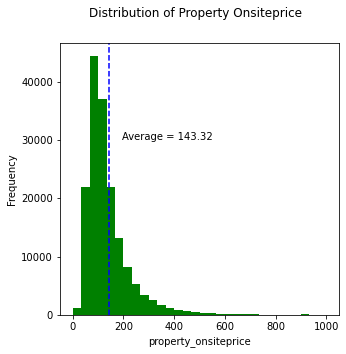

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

#Your code to answer Question 1
#1.What is the average price of the replaced onsiteprice? 

fig,(ax0)=plt.subplots(nrows=1,ncols=1,figsize=(5,5)) 
fig.suptitle("Distribution of Property Onsiteprice")

#Create the histogram
Order_details.replaced_onsiteprice.plot(kind="hist",range=[0,1000],color='g',bins=30,ax=ax0) 

#Add x-axis title
ax0.set_xlabel("property_onsiteprice")

#Add vertical average line
mean_price=Order_details.replaced_onsiteprice.mean()
ax0.axvline(mean_price,color="b",linestyle="--")
text = "Average = %.2f"% mean_price
ax0.annotate(text, xy=(mean_price+50, 30000)) #xy=(x-axis, y-axis)

print("The average price people spent is $%.2f"% mean_price)

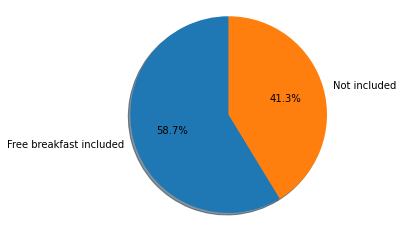

In [18]:
# Your code to answer Question 2 
#Based on order details, do more property reservations include free breakfasts?
breakfast_included = Order_details['mealinclusiontype'].count()
included_ratio = breakfast_included/Order_details['id'].count()
not_included_ratio=1-included_ratio

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Free breakfast included', 'Not included'
sizes = [included_ratio, not_included_ratio]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

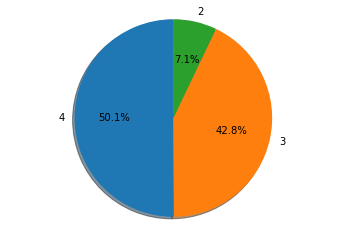

In [19]:
# Your code to answer Question 3
#What is the fraction of each starrating property in all orders?
Order_details = pd.merge(Order_details,Property_details[["propertyid","starrating"]],left_on = "propertycode",right_on = "propertyid")

type_counts = Order_details.starrating.value_counts()

labels = [i[0] for i in type_counts.items()]
sizes = [i[1] for i in type_counts.items()]

fig,ax1 = plt.subplots()
ax1.pie(sizes,labels = labels,autopct = "%1.1f%%",shadow = True , startangle = 90)
ax1.axis("equal")
plt.show()

Text(224.45041071901173, 10000, 'Average = 174.45')

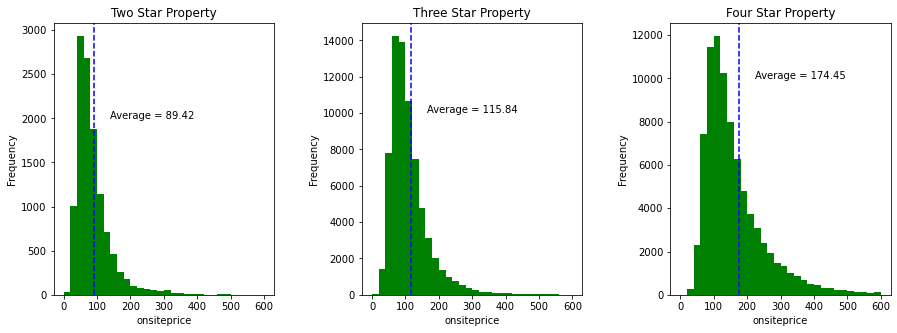

In [20]:
# Your code to answer Question 4
#What is the price range for each starrating property?
two_star = Order_details.loc[Order_details["starrating"] == 2]
three_star = Order_details.loc[Order_details["starrating"] == 3]
four_star = Order_details.loc[Order_details["starrating"] == 4]

fig,(ax0,ax1,ax2)=plt.subplots(nrows=1,ncols=3,figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)


#Create the histogram
two_star["replaced_onsiteprice"].plot(kind="hist",range=[0,600],color='g',bins=30,title = "Two Star Property",ax=ax0)
three_star["replaced_onsiteprice"].plot(kind="hist",range=[0,600],color='g',bins=30,title = "Three Star Property",ax=ax1) 
four_star["replaced_onsiteprice"].plot(kind="hist",range=[0,600],color='g',bins=30,title = "Four Star Property",ax=ax2) 

#Add x-axis title
ax0.set_xlabel("onsiteprice")
ax1.set_xlabel("onsiteprice")
ax2.set_xlabel("onsiteprice")

#Add vertical average line
two_mean_price=two_star["replaced_onsiteprice"].mean()
three_mean_price=three_star["replaced_onsiteprice"].mean()
four_mean_price=four_star["replaced_onsiteprice"].mean()

ax0.axvline(two_mean_price,color="b",linestyle="--")
ax0.annotate("Average = %.2f"% two_mean_price, xy=(two_mean_price+50, 2000)) #xy=(x-axis, y-axis)

ax1.axvline(three_mean_price,color="b",linestyle="--")
ax1.annotate("Average = %.2f"% three_mean_price, xy=(three_mean_price+50, 10000)) #xy=(x-axis, y-axis)

ax2.axvline(four_mean_price,color="b",linestyle="--")
ax2.annotate("Average = %.2f"% four_mean_price, xy=(four_mean_price+50, 10000)) #xy=(x-axis, y-axis)

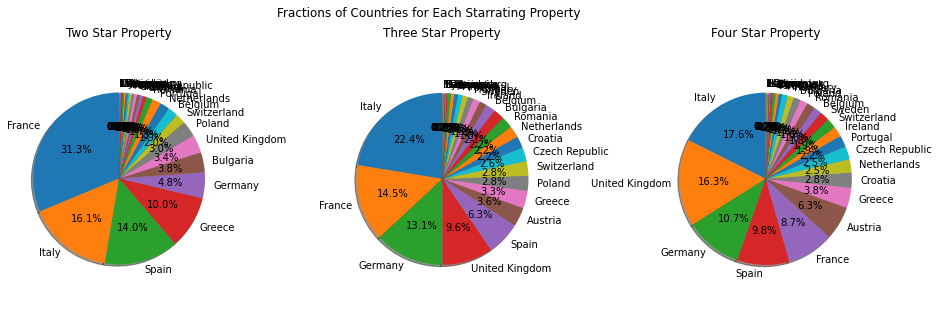

In [21]:
# Your code to answer Question 5
#For each starrating property, which country is it normally located? 
Property_details.groupby(["starrating","country"])["country"].count()

two_star = Property_details.loc[Property_details["starrating"] == 2]
two_country = two_star.country.value_counts()
two_labels = [i[0] for i in two_country.items()]
two_sizes = [i[1] for i in two_country.items()]

three_star = Property_details.loc[Property_details["starrating"] == 3]
three_country = three_star.country.value_counts()
three_labels = [i[0] for i in three_country.items()]
three_sizes = [i[1] for i in three_country.items()]

four_star = Property_details.loc[Property_details["starrating"] == 4]
four_country = four_star.country.value_counts()
four_labels = [i[0] for i in four_country.items()]
four_sizes = [i[1] for i in four_country.items()]

fig,(ax0,ax1,ax2)=plt.subplots(nrows=1,ncols=3,figsize=(15,5))
fig.suptitle("Fractions of Countries for Each Starrating Property")
fig.subplots_adjust(hspace=0.7, wspace=0.7)

ax0.pie(two_sizes,labels = two_labels,autopct = "%1.1f%%",shadow = True , startangle = 90)
ax0.set_title("Two Star Property")
ax0.axis("equal")

ax1.pie(three_sizes,labels = three_labels,autopct = "%1.1f%%",shadow = True , startangle = 90)
ax1.set_title("Three Star Property")
ax1.axis("equal")

ax2.pie(four_sizes,labels = four_labels,autopct = "%1.1f%%",shadow = True , startangle = 90)
ax2.set_title("Four Star Property")
ax2.axis("equal")

plt.show()

## Executive Summary & Business insights:


**(You need to use the cell below to write your executive summary & business insights)**
Note: If you need more space use enter to go to the next line.


PART 1 - Question Points: 
1a - 2 points;
1b - 1 point;
2a - 3 points;
2b - 2 points;
3a - 3 points;
3b - 1 point;
4a - 3 points;
4b - 4 points;
5a - 3 points;
5b - 3 points;
Bonus(a) - 1 point;
Bonus(b) - 1 point;

PART 2 - 
9 points total


Good Luck!

# Executive summary

Firstly, we found that the average price people spent on a property is 143.32 dollars and most orders's prices are cluttered in the price range of 100 dolloars and 400 dollars. Based on this, we may conclude that most people are seeking a low-price proprety and there are few people booking those expensive and luxury ones. That’s why the average price people spent is clined to the left side of the distribution graph. Thus, we conclude that most of the travelers still take price into consideration firstly when making reservations. Then we found that the percantge of reservations on properties including free breakfast and the percentage of reservations on properties without free breakfast is basically the same. The price of properties without breakfast might be lower, and this may imply that travelers may not care much about price when deciding to include breakfast or not.

Then we wonder what is the fraction of different star rating properties in the total orders, and we found that half of the properties in the orders are 4 stars and 42.8\% are 3 stars and only 7.1\% are 2 stars. People order far more 3-star and 4-star properties than 2-star ones. After that, we analyze what the price range for each star rating property is. The 4-star property’s average price is 174.45 dollars and 3-star property’s average price is 115.84 dollars, and 2-star property’s average price is 89.42 dollars. Based on the graphs and data, we noticed that the average price difference between 2-star property and 3-star property is only 26.42 dollars. That’s to say, with only 26.42 dollars increase, people can have marginal utility increase from 2- star to 3-star. That may explain why people order much more 3-star properties than 2-star properties. We can conclude that people still take price into consideration firstly, but they are also trying to reserve properties with more utilities with lower price.

This triggers our curiosity that for each star rating property, which country is it normally located? Answering this question may provide us with clues about preference of reservations for tourists in different countries. From the pie charts, we could see that two-star properties are mainly located in France, 3-star properties are normally located in Italy and France, and 4-star properties are located mainly in Italy and United Kingdom. Thus, we may conclude that tourists in Frace prefer 2-star property over 3-star property, probably for they care more about price. Tourists in Italy may care more about room utilities, so they order 3-star property and 4-star property more.